In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import spacy
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import *
import re

!python -m spacy download en
%matplotlib inline

Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
symbolic link created for C:\Users\Ebel\Anaconda3\lib\site-packages\spacy\data\en <<===>> C:\Users\Ebel\Anaconda3\lib\site-packages\en_core_web_sm
Linking successful
C:\Users\Ebel\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\Ebel\Anaconda3\lib\site-packages\spacy\data\en
You can now load the model via spacy.load('en')


In [2]:
df = pd.read_csv(r"C:\Users\Ebel\Downloads\Thinkful STuff\goodreads-best-books\book_data.csv")
df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [3]:
df = df.dropna(subset=['book_desc', 'book_title'])
df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [4]:
df['book_desc'].isnull().sum()

0

In [5]:
words = set(nltk.corpus.words.words())

In [6]:
import string

In [7]:
df.head(20)

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...
5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,100821,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...
6,C.S. Lewis|Pauline Baynes,"Journeys to the end of the world, fantastic cr...",Reissue Edition,Paperback,9.78007E+12,767 pages,4.25,437829,9439,The Chronicles of Narnia,Fantasy|Classics|Fiction|Young Adult|Childrens,https://images.gr-assets.com/books/1449868701l...
7,George Orwell,مزرعة الحيوانات هي رائعة جورج أورويل الخالدة.....,NaN,Paperback,9.78045E+12,122 pages,3.90,2235084,42156,Animal Farm,Classics|Fiction|Science Fiction|Dystopia|Fant...,https://images.gr-assets.com/books/1424037542l...
8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,17452,Gone with the Wind,Classics|Historical|Historical Fiction|Fiction...,https://images.gr-assets.com/books/1328025229l...
9,J.R.R. Tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,Mass Market Paperback,9.78035E+12,1728 pages,4.59,99793,1652,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...


In [8]:
# language = []
# def lang_ratio(text):
#     lang_ratio = {}
#     tokens = tokenizer.tokenize(text)
#     words = [word.lower() for word in tokens]
#     for language in stopwords.fileids():
#         stopwords_set = set(stopwords.fileids())
#         words_set = set(words)
#         common_elements = words_set.intersection(stopwords_set)
#         lang_ratio[language] = len(common_elements)
#     return lang_ratio
# def language_detect(text):
#         ratio = lang_ratio(text)
#         language = max(ratio, key=ratio.get)
#         return language
# df['language'] = language_detect(df['book_desc'].loc[0])

In [9]:
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [10]:
# df['language'].unique()

In [11]:
df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [12]:
nlp = spacy.load('en')
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [13]:
#Contraction map and expander found here;
# https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/contractions.py

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    if isEnglish(text) == False: 
        text = 'ASCII is FALSE'
        return text
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

In [14]:
df['book_desc']

0        Winning will make you famous. Losing means cer...
1        There is a door at the end of a silent corrido...
2        The unforgettable novel of a childhood in a sl...
3        «È cosa ormai risaputa che a uno scapolo in po...
4        About three things I was absolutely positive.F...
5        Trying to make sense of the horrors of World W...
6        Journeys to the end of the world, fantastic cr...
7        مزرعة الحيوانات هي رائعة جورج أورويل الخالدة.....
8        Gone with the Wind is a novel written by Marga...
9        لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...
10       Despite the tumor-shrinking medical miracle th...
11       Seconds before the Earth is demolished to make...
12       "Once there was a tree...and she loved a littl...
13       You can find the redesigned cover of this edit...
14       An ingenious code hidden in the works of Leona...
15       A literary sensation and runaway bestseller, t...
16       " I can't explain myself, I'm afraid, sir," sa.

In [15]:

# # Get names of indexes for which column Age has value 30
# indexNames = df[isEnglish(df['book_desc']) == false ].index
 
# # Delete these row indexes from dataFrame
# df.drop(indexNames , inplace=True)

In [16]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [17]:
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
#     text = expand_contractions(text)
    text = remove_stopwords(text)
#     print(text)
    return text

In [48]:
df['book_desc'].isnull().sum()

0

In [19]:
clean_text = []
for doc in df['book_desc']:
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text= doc
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
#     print(text)
    text = expand_contractions(text)
    text = remove_stopwords(text)
    clean_text.append(text)
df['clean_text'] = clean_text
    

In [20]:
df.head(20)

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,clean_text
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Winning make famous. Losing means certain deat...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,ASCII FALSE
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,unforgettable novel childhood sleepy Southern ...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,ASCII FALSE
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,ASCII FALSE
5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,100821,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...,"Trying make sense horrors World War II , Death..."
6,C.S. Lewis|Pauline Baynes,"Journeys to the end of the world, fantastic cr...",Reissue Edition,Paperback,9.78007E+12,767 pages,4.25,437829,9439,The Chronicles of Narnia,Fantasy|Classics|Fiction|Young Adult|Childrens,https://images.gr-assets.com/books/1449868701l...,ASCII FALSE
7,George Orwell,مزرعة الحيوانات هي رائعة جورج أورويل الخالدة.....,NaN,Paperback,9.78045E+12,122 pages,3.90,2235084,42156,Animal Farm,Classics|Fiction|Science Fiction|Dystopia|Fant...,https://images.gr-assets.com/books/1424037542l...,ASCII FALSE
8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,17452,Gone with the Wind,Classics|Historical|Historical Fiction|Fiction...,https://images.gr-assets.com/books/1328025229l...,"Gone Wind novel written Margaret Mitchell , fi..."
9,J.R.R. Tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,Mass Market Paperback,9.78035E+12,1728 pages,4.59,99793,1652,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...,ASCII FALSE


In [21]:
#We want to limit our data to the ASCII conforming data. Let's see how much that limits us to. 
dfasc = df[~df.clean_text.str.contains("ASCII FALSE")]
dfasc.shape

(29469, 13)

I want clean the text before tokenizing. 

In [22]:
cleaned_text = []
df['cleaned_text']= df['book_desc'].apply(expand_contractions)
df['cleaned_text']= df['book_desc'].apply(text_cleaner)

# for doc in df['book_desc']:
# #     doc = df['book_desc'].astype(str)
#     print(doc)
#     cleaned_text.append(text_cleaner(doc))
# df['cleaned_text'] = cleaned_text
# # df['book_desc_clean'] = text_cleaner(df['book_desc'])

In [27]:

tokens = []
lemma = []
pos = []

for doc in nlp.pipe(dfasc['clean_text'].astype('unicode').values, batch_size=50,
                        n_threads=8):

#     clean_doc = text_cleaner(doc)
#     clean_text.append([n.clean_doc] for n in doc)
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

dfasc['book_desc_tokens'] = tokens
dfasc['book_desc_lemma'] = lemma
dfasc['book_desc_pos'] = pos

C:\Users\Ebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [24]:
df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,clean_text,cleaned_text
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Winning make famous. Losing means certain deat...,Winning make famous. Losing means certain deat...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,ASCII FALSE,door end silent corridor. ’ haunting Harry Pot...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,unforgettable novel childhood sleepy Southern ...,unforgettable novel childhood sleepy Southern ...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,ASCII FALSE,«È cosa ormai risaputa che uno scapolo possess...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,ASCII FALSE,"three things absolutely positive.First , Edwar..."


In [29]:
print(dfasc['book_desc_tokens'])

0        [Winning, make, famous, ., Losing, means, cert...
2        [unforgettable, novel, childhood, sleepy, Sout...
5        [Trying, make, sense, horrors, World, War, II,...
8        [Gone, Wind, novel, written, Margaret, Mitchel...
10       [Despite, tumor, -, shrinking, medical, miracl...
12       [", tree, ..., loved, little, boy, ., ", begin...
13       [find, redesigned, cover, edition, HERE.This, ...
15       [literary, sensation, runaway, bestseller, ,, ...
16       [", can, not, explain, ,, afraid, ,, sir, ,, "...
21       [Romeo, Juliet, ,, Shakespeare, creates, world...
25       [Andrew, ", Ender, ", Wiggin, thinks, playing,...
31       [beloved, book, E., B., White, ,, author, Stua...
34       [find, alternative, cover, edition, ISBN, here...
35       [Brave, New, World, dystopian, novel, written,...
37       [Moral, allegory, spiritual, autobiography, ,,...
38       [happens, beautiful, girl, world, marries, han...
39       [", One, delightful, enduring, classics, child.

In [26]:
# df['language'] = np.where([isEnglish(str(df['book_desc']))== True], 'english', 'non-english')

ValueError: Length of values does not match length of index

In [30]:
df.head(20)

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,clean_text,cleaned_text
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Winning make famous. Losing means certain deat...,Winning make famous. Losing means certain deat...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,ASCII FALSE,door end silent corridor. ’ haunting Harry Pot...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,unforgettable novel childhood sleepy Southern ...,unforgettable novel childhood sleepy Southern ...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,ASCII FALSE,«È cosa ormai risaputa che uno scapolo possess...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,ASCII FALSE,"three things absolutely positive.First , Edwar..."
5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,100821,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...,"Trying make sense horrors World War II , Death...","Trying make sense horrors World War II , Death..."
6,C.S. Lewis|Pauline Baynes,"Journeys to the end of the world, fantastic cr...",Reissue Edition,Paperback,9.78007E+12,767 pages,4.25,437829,9439,The Chronicles of Narnia,Fantasy|Classics|Fiction|Young Adult|Childrens,https://images.gr-assets.com/books/1449868701l...,ASCII FALSE,"Journeys end world , fantastic creatures , epi..."
7,George Orwell,مزرعة الحيوانات هي رائعة جورج أورويل الخالدة.....,NaN,Paperback,9.78045E+12,122 pages,3.90,2235084,42156,Animal Farm,Classics|Fiction|Science Fiction|Dystopia|Fant...,https://images.gr-assets.com/books/1424037542l...,ASCII FALSE,مزرعة الحيوانات هي رائعة جورج أورويل الخالدة ....
8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,17452,Gone with the Wind,Classics|Historical|Historical Fiction|Fiction...,https://images.gr-assets.com/books/1328025229l...,"Gone Wind novel written Margaret Mitchell , fi...","Gone Wind novel written Margaret Mitchell , fi..."
9,J.R.R. Tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,Mass Market Paperback,9.78035E+12,1728 pages,4.59,99793,1652,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...,ASCII FALSE,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...


In [31]:
str(df['book_desc'].iloc[7])

'مزرعة الحيوانات هي رائعة جورج أورويل الخالدة.. اختيرت دائمًا ضمن أفضل الأعمال الأدبية في القرن العشرين .. تُرجمت لأكثر من سبعين لغة.. وقرأها الملايين في كل أنحاء العالم.. طُبعت هذه الرواية الأشهر لكاتبها للمرة الأولى في عام 1945 .. وتحكى عن مجموعة من الحيوانات قررت القيام بثورة ضد مالك المزرعة لتحكم نفسها بنفسها وتتولى شئون حياتها. وهنا برع أورويل في أن يُجرى نوعًا من الحكمة السياسية الساخرة والممتعة على ألسنة الحيوانات، تكشف التناقض الحاد بين الشعارات الثورية وممارسات الحكام بعد الثورة، على خلفية نقده اللاذع للديكتاتور السوفيتي جوزيف ستالين.. لكنه يتجاوز ذلك أيضًا ليغوص بعيدًا في أعماق الحيوانات التي منها ــ وليس على رأسها ــ الإنسان.يعتبر جورج أورويل 1903-1950 من أهم الكُـتَّاب البريطانيين في القرن العشرين. ولد في الهند وعمل في بورما بالشرطة البريطانية، عاش فقرا مدقعًا في لندن وباريس، وتطوع عام 1936 ليحارب في صفوف الجمهوريين في إسبانيا ضد قوات فرانكو الفاشية، ثم عمل بهيئة الإذاعة البريطانية وكمحرر وصحفي حتى نهاية حياته. اهتم أورويل طوال حياته بالدفاع عن المظلومين والحق والديمقراطية 

In [32]:
isEnglish(str(df['book_desc'].iloc[7]))

False

In [33]:
expand_contractions(df['book_desc'].iloc[7])

'ASCII is FALSE'

In [34]:
dfasc.head(20)

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,clean_text,book_desc_tokens,book_desc_lemma,book_desc_pos
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Winning make famous. Losing means certain deat...,"[Winning, make, famous, ., Losing, means, cert...","[win, make, famous, ., lose, mean, certain, de...","[VERB, VERB, ADJ, PUNCT, VERB, VERB, ADJ, NOUN..."
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,unforgettable novel childhood sleepy Southern ...,"[unforgettable, novel, childhood, sleepy, Sout...","[unforgettable, novel, childhood, sleepy, sout...","[ADJ, ADJ, NOUN, ADJ, ADJ, NOUN, NOUN, NOUN, V..."
5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,100821,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...,"Trying make sense horrors World War II , Death...","[Trying, make, sense, horrors, World, War, II,...","[try, make, sense, horror, World, War, II, ,, ...","[VERB, VERB, NOUN, NOUN, PROPN, PROPN, PROPN, ..."
8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,17452,Gone with the Wind,Classics|Historical|Historical Fiction|Fiction...,https://images.gr-assets.com/books/1328025229l...,"Gone Wind novel written Margaret Mitchell , fi...","[Gone, Wind, novel, written, Margaret, Mitchel...","[go, Wind, novel, write, Margaret, Mitchell, ,...","[VERB, PROPN, NOUN, VERB, PROPN, PROPN, PUNCT,..."
10,John Green,Despite the tumor-shrinking medical miracle th...,NaN,Hardcover,9.78053E+12,313 pages,4.24,2881648,147270,The Fault in Our Stars,Young Adult|Fiction|Romance|Contemporary,https://images.gr-assets.com/books/1360206420l...,Despite tumor-shrinking medical miracle bought...,"[Despite, tumor, -, shrinking, medical, miracl...","[despite, tumor, -, shrink, medical, miracle, ...","[ADP, NOUN, PUNCT, VERB, ADJ, NOUN, VERB, NOUN..."
12,Shel Silverstein,"""Once there was a tree...and she loved a littl...",NaN,Hardcover,9.78006E+12,64 pages,4.37,789681,15694,The Giving Tree,Childrens|Childrens|Picture Books|Classics|Fic...,https://images.gr-assets.com/books/1174210942l...,""" tree ... loved little boy. "" begins story un...","["", tree, ..., loved, little, boy, ., "", begin...","["", tree, ..., love, little, boy, ., "", begin,...","[PUNCT, NOUN, PUNCT, VERB, ADJ, NOUN, PUNCT, P..."
13,Emily Brontë|Richard J. Dunn|David Timson|Char...,You can find the redesigned cover of this edit...,Fourth Edition,Paperback,9.78039E+12,464 pages,3.84,1121100,29400,Wuthering Heights,Classics|Fiction|Romance|Literature,https://images.gr-assets.com/books/1388212715l...,find redesigned cover edition HERE.This best-s...,"[find, redesigned, cover, edition, HERE.This, ...","[find, redesign, cover, edition, here.this, be...","[VERB, VERB, NOUN, NOUN, NOUN, ADV, PUNCT, VER..."
15,Arthur Golden,"A literary sensation and runaway bestseller, t...",Large Print,Hardcover,9.78074E+12,434 pages,4.09,1525851,27168,Memoirs of a Geisha,Fiction|Historical|Historical Fiction|Romance|...,https://images.gr-assets.com/books/1388367666l...,"literary sensation runaway bestseller , brilli...","[literary, sensation, runaway, bestseller, ,, ...","[literary, sensation, runaway, bestseller, ,, ...","[ADJ, NOUN, ADJ, NOUN, PUNCT, ADJ, NOUN, NOUN,..."
16,Lewis Carroll|John Tenniel|Martin Gardner,""" I can't explain myself, I'm afraid, sir,"" sa...",NaN,Mass Market Paperback,9.78

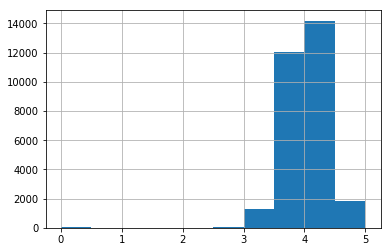

In [37]:
dfasc['book_rating'].hist()

In [ ]:
dfasc['book_rating_count'].hist()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
BOWfeatures = vectorizer.fit_transform(dfasc['clean_text'])

In [43]:
print(BOWfeatures)

  (0, 63471)	1
  (0, 81936)	1
  (0, 89528)	1
  (0, 9795)	1
  (0, 18477)	1
  (0, 82568)	1
  (0, 82107)	1
  (0, 54036)	1
  (0, 100782)	1
  (0, 94044)	1
  (0, 77351)	1
  (0, 88422)	1
  (0, 11310)	1
  (0, 71169)	1
  (0, 69227)	1
  (0, 21002)	1
  (0, 56192)	1
  (0, 71210)	1
  (0, 90349)	1
  (0, 99142)	1
  (0, 48865)	2
  (0, 77350)	1
  (0, 32990)	1
  (0, 216)	1
  (0, 82290)	1
  :	:
  (29468, 33324)	1
  (29468, 73790)	1
  (29468, 78486)	2
  (29468, 63315)	1
  (29468, 88510)	1
  (29468, 92054)	1
  (29468, 7677)	1
  (29468, 66339)	1
  (29468, 13669)	1
  (29468, 36783)	1
  (29468, 77909)	1
  (29468, 83323)	1
  (29468, 25812)	1
  (29468, 16826)	1
  (29468, 35610)	1
  (29468, 93376)	1
  (29468, 71345)	1
  (29468, 95410)	1
  (29468, 78896)	1
  (29468, 64100)	1
  (29468, 100024)	1
  (29468, 12635)	3
  (29468, 65125)	3
  (29468, 66106)	1
  (29468, 41929)	1


In [ ]:
df['']

In [38]:
# Utility function to create a list of the 2000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df

In [51]:
all_text = dfasc['clean_text'].str.cat(sep=' ')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
 
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
print(all_text)

In [52]:
def text_saver(str):
    f= open(r"C:\Users\Ebel\Documents\raw_corpus.txt","w+")
    #f=open("guru99.txt","a+")
    for i in range(2):
         f.write("This is test line %d\r\n" % (i+1))
    f.write(str)
    f.close()
    #Open the file back and read the contents
    #f=open("guru99.txt", "r")
    #if f.mode == 'r':
    #   contents =f.read()
    #    print (contents)
    #or, readlines reads the individual line into a list
    #fl =f.readlines()
    #for x in fl:
    #print(x)


In [53]:
text_saver(all_text)

In [54]:
dfasc.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,clean_text,book_desc_tokens,book_desc_lemma,book_desc_pos
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Winning make famous. Losing means certain deat...,"[Winning, make, famous, ., Losing, means, cert...","[win, make, famous, ., lose, mean, certain, de...","[VERB, VERB, ADJ, PUNCT, VERB, VERB, ADJ, NOUN..."
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,unforgettable novel childhood sleepy Southern ...,"[unforgettable, novel, childhood, sleepy, Sout...","[unforgettable, novel, childhood, sleepy, sout...","[ADJ, ADJ, NOUN, ADJ, ADJ, NOUN, NOUN, NOUN, V..."
5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,100821,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...,"Trying make sense horrors World War II , Death...","[Trying, make, sense, horrors, World, War, II,...","[try, make, sense, horror, World, War, II, ,, ...","[VERB, VERB, NOUN, NOUN, PROPN, PROPN, PROPN, ..."
8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,17452,Gone with the Wind,Classics|Historical|Historical Fiction|Fiction...,https://images.gr-assets.com/books/1328025229l...,"Gone Wind novel written Margaret Mitchell , fi...","[Gone, Wind, novel, written, Margaret, Mitchel...","[go, Wind, novel, write, Margaret, Mitchell, ,...","[VERB, PROPN, NOUN, VERB, PROPN, PROPN, PUNCT,..."
10,John Green,Despite the tumor-shrinking medical miracle th...,NaN,Hardcover,9.78053E+12,313 pages,4.24,2881648,147270,The Fault in Our Stars,Young Adult|Fiction|Romance|Contemporary,https://images.gr-assets.com/books/1360206420l...,Despite tumor-shrinking medical miracle bought...,"[Despite, tumor, -, shrinking, medical, miracl...","[despite, tumor, -, shrink, medical, miracle, ...","[ADP, NOUN, PUNCT, VERB, ADJ, NOUN, VERB, NOUN..."


In [128]:

common_words = get_top_n_words(all_text, 20)
for word, freq in common_words:
    print(word, freq)

ValueError: Iterable over raw text documents expected, string object received.

In [55]:
from collections import Counter 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(dfasc['book_desc_lemma']) 
most_occur = Counter.most_common(4) 

NameError: name 'data_set' is not defined

In [59]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [60]:
alltextcorpus = [line.replace("\n", "") for line in open(r"C:\Users\Ebel\Documents\raw_corpus.txt")]
frequent_words = get_top_n_words(alltextcorpus, 20)

for word, freq in frequent_words:
    print(word, freq)

not 14164
one 13801
life 13243
new 10630
world 9605
book 7941
love 7903
story 7025
time 6514
first 6388
no 5424
man 5224
years 5120
two 4969
family 4915
old 4572
young 4516
find 4458
novel 4369
must 4228


In [84]:
alltextcorpus = [line.replace("\n", "") for line in open(r"C:\Users\Ebel\Documents\raw_corpus.txt")]
common_words =[]
frequent_words = get_top_n_words(alltextcorpus, 2000)
def check(word, list):
    if word in list:
        print("The word is in the list!")
    else:
        print("The word is not in the list!")
for word, freq in frequent_words:
    common_words.append(word)
#I want to make a copy of the dataframe for BOW. 
dfbow = dfasc
for word in common_words: 
    dfbow[word] = 0
dfbow['unique_word_count'] = 0


# def bow_features(sentences, common_words):
    

    
    
#     # Process each row, counting the occurrence of words in each sentence.
#     for i, summary in enumerate(df['text_sentence']):
        
        
        
#         # Populate the row with word counts.
#         for word in words:
#             df.loc[i, word] += 1
        
#         # This counter is just to make sure the kernel didn't hang.
#         if i % 50 == 0:
#             print("Processing row {}".format(i))
            
#     return df

C:\Users\Ebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Ebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
for word in common_words: 
    dfbow[word] = 0
dfbow['unique_word_count'] = 0

In [93]:

dfbow.head()

,level_0,index,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,...,intriguing,walking,tender,twists,once,count,teachers,forgiveness,fourteen,unique_word_count
0,0,0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,...,0,0,0,0,0,0,0,0,63,71
1,1,2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,...,0,0,0,0,0,0,0,0,48,48
2,2,5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,...,0,0,0,0,0,0,0,0,20,13
3,3,8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,...,0,0,0,0,0,0,0,0,31,41
4,4,10,John Green,Despite the tumor-shrinking medical miracle th...,NaN,Hardcover,9.78053E+12,313 pages,4.24,2881648,...,0,0,0,0,0,0,0,0,30,40


In [95]:
#reseting index after all the drops we made
# dfbow.reset_index(inplace = True)
dfbow['Summary_Length'] = 0

for i, summary in enumerate(dfbow.loc[1:10, 'book_desc_lemma']):
        
        lemmas = Counter(summary)
        
        for lemma in common_words: 
            dfbow.loc[i, lemma] = lemmas[lemma]
            dfbow.loc[i, 'Summary_Length'] = sum(lemmas.values())
        # Populate the row with word counts.
#         for lemma in summary:
#             if lemma in common_words:
                
#             else:
#                 dfbow.loc[i, 'unique_word_count'] += 1
            
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
dfbow.head()

C:\Users\Ebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Processing row 0


,level_0,index,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,...,walking,tender,twists,once,count,teachers,forgiveness,fourteen,unique_word_count,Summary_Length
0,0,0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,...,0,0,0,0,0,0,0,0,71,96
1,1,2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,...,0,0,0,0,0,0,0,0,48,33
2,2,5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,...,0,0,0,0,0,0,0,0,13,72
3,3,8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,...,0,0,0,0,0,0,0,0,41,70
4,4,10,John Green,Despite the tumor-shrinking medical miracle th...,NaN,Hardcover,9.78053E+12,313 pages,4.24,2881648,...,0,1,0,0,0,0,0,0,40,80


In [92]:
lemmaTest = Counter
sum(Counter(dfbow.loc[1, 'book_desc_lemma']))

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
from sklearn.linear_model import Lasso
x_train, x_test, y_train, y_test = train_test_split(df[, 'book_desc_pos':], df['book_rating'], test_size= .2)
LR = Lasso(alpha=.1)
LR.fit(x_train, y_train)
LR.score(x_test, y_test)

In [96]:
dfbow.shape

(29469, 2020)

In [112]:
((72/10)*2.5)

18.0

In [117]:
import time
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(summary, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    dfbow = pd.DataFrame(columns=common_words)
    dfbow['summary'] = dfasc['clean_text']
    dfbow['text_source'] = dfasc['book_rating']
    dfbow.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(dfbow['summary']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in summary
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            dfbow.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df



In [119]:
start = time.time()


bow_features(dfasc.loc[0:1, 'book_desc_lemma'], common_words)
end = time.time()
print(end-start)
dfbow.head()

AttributeError: 'list' object has no attribute 'is_punct'

In [99]:
dfasc.head()

,level_0,index,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,...,walking,tender,twists,once,count,teachers,forgiveness,fourteen,unique_word_count,Summary_Length
0,0,0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,...,0,0,0,0,0,0,0,0,71,96
1,1,2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,...,0,0,0,0,0,0,0,0,48,33
2,2,5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,...,0,0,0,0,0,0,0,0,13,72
3,3,8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,...,0,0,0,0,0,0,0,0,41,70
4,4,10,John Green,Despite the tumor-shrinking medical miracle th...,NaN,Hardcover,9.78053E+12,313 pages,4.24,2881648,...,0,1,0,0,0,0,0,0,40,80


In [101]:
for col in dfasc:
    print(col)

level_0
index
book_authors
book_desc
book_edition
book_format
book_isbn
book_pages
book_rating
book_rating_count
book_review_count
book_title
genres
image_url
clean_text
book_desc_tokens
book_desc_lemma
book_desc_pos
not
one
life
new
world
book
love
story
time
first
no
man
years
two
family
old
young
find
novel
must
even
way
like
never
would
war
people
ever
back
year
could
best
work
lives
home
death
author
series
also
make
woman
day
heart
past
long
friends
human
secret
power
get
finds
help
three
great
girl
every
history
us
well
many
dark
together
set
last
stories
school
may
come
father
take
know
readers
mother
become
the
everything
little
american
true
cannot
much
tale
place
york
times
yet
friend
men
good
de
night
something
city
things
takes
beautiful
comes
edition
knows
powerful
away
dead
town
journey
whose
high
face
boy
made
go
soon
women
children
still
another
end
books
mysterious
future
century
house
around
written
lost
known
part
found
begins
wants
it
truth
in
always
secrets
left
b

souls
ruthless
result
detail
started
considered
st
victims
bed
front
choices
uncle
seemingly
unlikely
desires
california
chilling
dalam
seeking
me
watch
frank
mountains
writes
scientific
astonishing
hospital
seeks
lessons
chosen
japanese
weeks
stolen
companion
couple
moral
india
list
provide
brain
serious
health
period
lie
runs
monster
fully
lands
slowly
german
solve
ice
trail
breaking
felt
returned
knowing
drawing
field
soldiers
plays
encounters
himself
buried
games
member
driven
cause
wolf
camp
terms
professor
disaster
explore
expected
brilliantly
here
unusual
classics
essential
draws
sword
youth
stands
balance
welcome
aunt
uses
gold
surprising
los
10
tree
slave
re
desert
bear
birthday
interest
greater
sarah
tour
civilization
pay
continue
keeps
connection
arms
level
meeting
suicide
piece
web
whatever
sold
conclusion
setting
ghosts
southern
intense
central
critical
overcome
snow
grown
travels
global
professional
anna
hair
biggest
lonely
wars
advice
wish
forward
emma
coast
spend
desper

In [103]:
df['genres'].unique

<bound method Series.unique of 0        Young Adult|Fiction|Science Fiction|Dystopia|F...
1                              Fantasy|Young Adult|Fiction
2        Classics|Fiction|Historical|Historical Fiction...
3                                 Classics|Fiction|Romance
4        Young Adult|Fantasy|Romance|Paranormal|Vampire...
5        Historical|Historical Fiction|Fiction|Young Adult
6           Fantasy|Classics|Fiction|Young Adult|Childrens
7        Classics|Fiction|Science Fiction|Dystopia|Fant...
8        Classics|Historical|Historical Fiction|Fiction...
9                                 Fantasy|Fiction|Classics
10                Young Adult|Fiction|Romance|Contemporary
11          Science Fiction|Fiction|Humor|Fantasy|Classics
12       Childrens|Childrens|Picture Books|Classics|Fic...
13                     Classics|Fiction|Romance|Literature
14                                Fiction|Mystery|Thriller
15       Fiction|Historical|Historical Fiction|Romance|...
16                      C

In [121]:
Fantasy = dfasc[dfasc.clean_text.str.contains("Fantasy")]
Fantasy.shape

(72, 2020)

In [122]:
all_text = Fantasy['clean_text'].str.cat(sep=' ')

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
 
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [124]:
print(all_text)

Beginning short story appearing Magazine Fantasy Science Fiction 1978 , publication Stephen Kings epic work fantasy considers single long novel magnum opus spanned quarter century.Set world extraordinary circumstances , filled stunning visual imagery unforgettable characters , Dark Tower series Kings visionary feat storytelling , magical mix science fiction , fantasy , horror may well crowning achievement.Book IIn Gunslinger ( originally published 1982 ) , King introduces enigmatic hero , Roland Deschain Gilead , Last Gunslinger. haunting , solitary figure first , mysterious quest desolate world eerily mirrors own. Pursuing man black , evil bring dead back life , Roland good man seems leave nothing death wake . One popular critically acclaimed comic book titles time , New York Times best-selling author Neil Gaimans masterpiece Sandman set new standards mature , lyrical fantasy graphic narrative. , Vertigo DC Comics proud present first four definitive Absolute Editions collecting ground

In [125]:
text_saver(all_text)

In [129]:
alltextcorpus = [line.replace("\n", "") for line in open(r"C:\Users\Ebel\Documents\raw_corpus.txt")]
common_words =[]
frequent_words = get_top_n_words(alltextcorpus, 2000)

In [132]:

# common_words = get_top_n_words(all_text, 20)
for word, freq in frequent_words:
    print(word, freq)

fantasy 101
world 70
one 40
book 37
story 31
first 31
new 30
award 26
fiction 23
life 23
time 22
man 21
dark 20
magic 20
best 19
love 19
young 18
years 18
science 17
novel 17
stories 17
series 16
not 16
horror 15
find 15
volume 14
adventure 14
short 13
every 13
sandman 12
two 12
war 12
could 12
brie 12
characters 11
tale 11
come 11
game 11
three 11
city 11
work 10
winning 10
never 10
shadow 10
woman 10
finds 10
day 10
manga 10
must 10
tales 10
human 10
another 10
magazine 9
magical 9
published 9
king 9
comic 9
author 9
dream 9
writer 9
like 9
power 9
dreams 9
winner 9
art 9
great 9
century 8
may 8
last 8
mysterious 8
quest 8
back 8
full 8
powerful 8
classic 8
beyond 8
robert 8
writers 8
begins 8
page 8
no 8
heart 8
amazing 8
light 8
people 8
christmas 8
dragon 8
epic 7
long 7
set 7
bring 7
death 7
gaiman 7
saga 7
place 7
works 7
called 7
the 7
final 7
known 7
make 7
way 7
part 7
kingdom 7
anything 7
get 7
lives 7
it 7
read 7
collection 7
help 7
mage 7
this 6
gunslinger 6
complete 6
sho

yet 2
bold 2
enough 2
crippled 2
of 2
terrifying 2
actually 2
strong 2
nightmare 2
brent 2
everyone 2
loved 2
populated 2
desperate 2
crazy 2
obsidian 2
elves 2
though 2
walls 2
candle 2
demon 2
elf 2
mages 2
might 2
to 2
kellen 2
skills 2
convince 2
kellens 2
jermayan 2
price 2
thousand 2
mountain 2
hell 2
gil 2
wizards 2
princes 2
stay 2
blue 2
stoker 2
international 2
hiding 2
laws 2
later 2
got 2
della 2
1965 2
la 2
retiefs 2
owner 2
leaving 2
pushing 2
ago 2
attempt 2
hafwynder 2
given 2
honor 2
surgery 2
increase 2
numerous 2
keyess 2
education 2
career 2
came 2
guilds 2
trifect 2
watcher 2
screwball 2
expert 2
diane 2
vision 2
cambist 2
leviathan 2
wept 2
2007 2
2004 2
2001 2
damon 2
werewolf 2
exiles 2
woods 2
working 2
tear 2
planet 2
lenfell 2
greater 2
mageborn 2
margaret 2
artie 2
picara 2
level 2
drawing 2
focus 2
professional 2
adding 2
shojo 2
chibi 2
using 2
says 2
critically 1
standards 1
mature 1
lyrical 1
vertigo 1
dc 1
definitive 1
editions 1
groundbreaking 1
entire

shade 1
notorious 1
fist 1
peculiar 1
unusually 1
intervention 1
unlikely 1
hubert 1
dot 1
situation 1
rampant 1
cursed 1
shadows 1
mistletoe 1
holiday 1
snowy 1
winters 1
bundle 1
faith 1
passions 1
seasonal 1
naughty 1
nice 1
marriage 1
ultimatum 1
millionaires 1
wish 1
merry 1
composed 1
pig 1
garden 1
devil 1
alarmed 1
hobby 1
upstage 1
job 1
finding 1
allergy 1
losing 1
altogther 1
tupperware 1
box 1
horrific 1
laugh 1
deaths 1
puts 1
bizarre 1
twist 1
hurt 1
more 1
songs 1
poignant 1
startling 1
expect 1
disneyland 1
westworld 1
dreampark 1
21st 1
wildest 1
simulations 1
illusions 1
lasers 1
holograms 1
computer 1
generated 1
ride 1
open 1
prairie 1
jessie 1
kid 1
frontierworld 1
sprout 1
gills 1
undersea 1
oceanworld 1
dinosaurs 1
link 1
primalworld 1
play 1
beach 1
blanket 1
bingo 1
frankie 1
annette 1
surferworld 1
fight 1
fair 1
damsel 1
fantasyworld 1
oldest 1
programs 1
onmibus 1
william 1
simmons 1
net 1
collide 1
pursuit 1
thirst 1
resort 1
specializing 1
fulfillment 1
ex

In [55]:
from collections import Counter 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(dfasc['book_desc_lemma']) 
most_occur = Counter.most_common(4) 

NameError: name 'data_set' is not defined

In [59]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [60]:
alltextcorpus = [line.replace("\n", "") for line in open(r"C:\Users\Ebel\Documents\raw_corpus.txt")]
frequent_words = get_top_n_words(alltextcorpus, 20)

for word, freq in frequent_words:
    print(word, freq)

not 14164
one 13801
life 13243
new 10630
world 9605
book 7941
love 7903
story 7025
time 6514
first 6388
no 5424
man 5224
years 5120
two 4969
family 4915
old 4572
young 4516
find 4458
novel 4369
must 4228


In [59]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [60]:
alltextcorpus = [line.replace("\n", "") for line in open(r"C:\Users\Ebel\Documents\raw_corpus.txt")]
frequent_words = get_top_n_words(alltextcorpus, 20)

for word, freq in frequent_words:
    print(word, freq)

not 14164
one 13801
life 13243
new 10630
world 9605
book 7941
love 7903
story 7025
time 6514
first 6388
no 5424
man 5224
years 5120
two 4969
family 4915
old 4572
young 4516
find 4458
novel 4369
must 4228


In [133]:
common_words =[]
frequent_words = get_top_n_words(alltextcorpus, 2000)
def check(word, list):
    if word in list:
        print("The word is in the list!")
    else:
        print("The word is not in the list!")
for word, freq in frequent_words:
    common_words.append(word)
#I want to make a copy of the dataframe for BOW. 

for word in common_words: 
    Fantasy[word] = 0
dfbow['unique_word_count'] = 0


# def bow_features(sentences, common_words):
    

    
    
#     # Process each row, counting the occurrence of words in each sentence.
#     for i, summary in enumerate(df['text_sentence']):
        
        
        
#         # Populate the row with word counts.
#         for word in words:
#             df.loc[i, word] += 1
        
#         # This counter is just to make sure the kernel didn't hang.
#         if i % 50 == 0:
#             print("Processing row {}".format(i))
            
#     return df

C:\Users\Ebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Ebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
for word in common_words: 
    dfbow[word] = 0
dfbow['unique_word_count'] = 0

In [93]:

dfbow.head()

,level_0,index,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,...,intriguing,walking,tender,twists,once,count,teachers,forgiveness,fourteen,unique_word_count
0,0,0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,...,0,0,0,0,0,0,0,0,63,71
1,1,2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,...,0,0,0,0,0,0,0,0,48,48
2,2,5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,...,0,0,0,0,0,0,0,0,20,13
3,3,8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,...,0,0,0,0,0,0,0,0,31,41
4,4,10,John Green,Despite the tumor-shrinking medical miracle th...,NaN,Hardcover,9.78053E+12,313 pages,4.24,2881648,...,0,0,0,0,0,0,0,0,30,40


In [140]:
#reseting index after all the drops we made
Fantasy.reset_index(inplace = True, drop=True)
Fantasy['Summary_Length'] = 0
start = time.time()
for i, summary in enumerate(Fantasy['book_desc_lemma']):
        
#         lemmas = Counter(summary)
        
#         for lemma in common_words: 
            
# #             dfbow.loc[i, 'Summary_Length'] = sum(lemmas.values())
#         Populate the row with word counts.
        for lemma in summary:
            if lemma in common_words:
                Fantasy.loc[i, lemma] += 1
            else:
                Fantasy.loc[i, 'unique_word_count'] += 1
            
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
end = time.time()
print(end-start)
            
dfbow.head()

C:\Users\Ebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Processing row 0
Processing row 50
1164.2825603485107


,level_0,index,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,...,episodes,tennants,swan,hadokes,wry,observations,chronicle,performer,moths,ate
0,0,0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,10,John Green,Despite the tumor-shrinking medical miracle th...,NaN,Hardcover,9.78053E+12,313 pages,4.24,2881648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lemmaTest = Counter
sum(Counter(dfbow.loc[1, 'book_desc_lemma']))

In [176]:
TrainSet = Fantasy.drop( 
                ['level_0', 'index', 'book_authors', 'book_desc', 'book_edition', 'book_format','book_isbn',
                 'book_rating', 'book_rating_count', 'book_review_count', 'book_title', 'genres', 'image_url', 'book_pages', 'clean_text', 'book_desc_tokens', 'book_desc_lemma', 'book_desc_pos'], axis=1)

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(TrainSet, Fantasy['book_rating'], test_size= .2)
print (x_train.shape, y_train.shape)

(57, 3062) (57,)


In [263]:
lass = Lasso(alpha=.1)
# lass.fit(X_train, y_train)
# lass.score(X_test, y_test)

In [165]:
Fantasy['book_rating'].head()

0    3.97
1    4.65
2    4.23
3    4.03
4    3.89
Name: book_rating, dtype: float64

In [174]:
x_train.head()

,book_pages,clean_text,book_desc_tokens,book_desc_lemma,book_desc_pos,not,one,life,new,world,...,episodes,tennants,swan,hadokes,wry,observations,chronicle,performer,moths,ate
59,216 pages,"Wikipedia : Daniel Keyes ( born August 9 , 192...","[Wikipedia, :, Daniel, Keyes, (, born, August,...","[wikipedia, :, Daniel, Keyes, (, bear, August,...","[NOUN, PUNCT, PROPN, PROPN, PUNCT, VERB, PROPN...",0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
57,227 pages,"Book four Dragon Scholar Saga , Fantasy Romanc...","[Book, four, Dragon, Scholar, Saga, ,, Fantasy...","[book, four, Dragon, Scholar, Saga, ,, Fantasy...","[NOUN, NUM, PROPN, PROPN, PROPN, PUNCT, PROPN,...",1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
25,306 pages,"Shadow Named Envy lead dark fantasy world , fi...","[Shadow, Named, Envy, lead, dark, fantasy, wor...","[Shadow, Named, Envy, lead, dark, fantasy, wor...","[PROPN, PROPN, PROPN, VERB, ADJ, NOUN, NOUN, P...",1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
19,669 pages,stunning sequel Wayfarer RedemptionAxis true h...,"[stunning, sequel, Wayfarer, RedemptionAxis, t...","[stunning, sequel, Wayfarer, RedemptionAxis, t...","[ADJ, NOUN, PROPN, PROPN, ADJ, NOUN, PUNCT, DE...",0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,176 pages,two soldiers opposite sides never-ending galac...,"[two, soldiers, opposite, sides, never, -, end...","[two, soldier, opposite, side, never, -, end, ...","[NUM, NOUN, ADJ, NOUN, ADV, PUNCT, VERB, ADJ, ...",0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
total_tfidf=vectorizer.fit_transform(dfasc['clean_text'])
print(dfasc.shape)

#splitting into training and test sets


(29469, 3075)


In [241]:
X_train_tfidf, X_test_tfidf= train_test_split(total_tfidf, test_size=0.4)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.


In [242]:
print('Original summary:', dfasc.loc[0, 'book_desc'])
print('Tf_idf vector:', tfidf_bypara[0])

Original summary: Winning will make you famous. Losing means certain death.The nation of Panem, formed from a post-apocalyptic North America, is a country that consists of a wealthy Capitol region surrounded by 12 poorer districts. Early in its history, a rebellion led by a 13th district against the Capitol resulted in its destruction and the creation of an annual televised event known as the Hunger Games. In punishment, and as a reminder of the power and grace of the Capitol, each district must yield one boy and one girl between the ages of 12 and 18 through a lottery system to participate in the games. The 'tributes' are chosen during the annual Reaping and are forced to fight to the death, leaving only one survivor to claim victory.When 16-year-old Katniss's young sister, Prim, is selected as District 12's female representative, Katniss volunteers to take her place. She and her male counterpart Peeta, are pitted against bigger, stronger representatives, some of whom have trained for

In [212]:
Fantasy.shape

(72, 3075)

In [214]:
72*.6

43.199999999999996

In [244]:
total_idf_h =  total_tfidf.tocsr()
n = total_idf_h.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*total_idf_h.nonzero()):
    tfidf_bypara[i][terms[j]] = total_idf_h[i, j]
print('Original summary:', dfasc.loc[0, 'book_desc'])
print('Tf_idf vector:', tfidf_bypara[0])

Original summary: Winning will make you famous. Losing means certain death.The nation of Panem, formed from a post-apocalyptic North America, is a country that consists of a wealthy Capitol region surrounded by 12 poorer districts. Early in its history, a rebellion led by a 13th district against the Capitol resulted in its destruction and the creation of an annual televised event known as the Hunger Games. In punishment, and as a reminder of the power and grace of the Capitol, each district must yield one boy and one girl between the ages of 12 and 18 through a lottery system to participate in the games. The 'tributes' are chosen during the annual Reaping and are forced to fight to the death, leaving only one survivor to claim victory.When 16-year-old Katniss's young sister, Prim, is selected as District 12's female representative, Katniss volunteers to take her place. She and her male counterpart Peeta, are pitted against bigger, stronger representatives, some of whom have trained for

In [243]:
X_train_tfidf, X_test_tfidf= train_test_split(total_tfidf, test_size=0.4)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = total_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.

In [245]:
dfasc.append(tfidf_bypara)

MemoryError: 

In [248]:
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(tfidf_bypara, dfasc['book_rating'])

ValueError: Expected 2D array, got 1D array instead:
array=[{'winning': 0.06407806120872553, 'make': 0.04728276425487093, 'famous': 0.06619600069204154, 'losing': 0.07624787964949195, 'means': 0.06385577049404073, 'certain': 0.07318592156537555, 'death': 0.19080994039161722, 'nation': 0.07723057087742, 'panem': 0.12680695655861848, 'formed': 0.09128128369391862, 'post': 0.07580130321730641, 'apocalyptic': 0.09281797525942866, 'north': 0.07059400435171921, 'america': 0.06284179675782096, 'country': 0.06073743454928894, 'consists': 0.10234861157111018, 'wealthy': 0.0754462697531514, 'capitol': 0.33604192569763724, 'region': 0.09634170039850219, 'surrounded': 0.08511163341458697, '12': 0.16204492287858777, 'poorer': 0.138114707154164, 'districts': 0.1284493434927284, 'early': 0.06617595155526944, 'history': 0.051485057802951185, 'rebellion': 0.08641730441736156, 'led': 0.07081578512582232, '13th': 0.11714159289718293, 'district': 0.29401767642346943, 'resulted': 0.10672230659074955, 'destruction': 0.07352113415547629, 'creation': 0.0809067415036032, 'annual': 0.19448327330449108, 'televised': 0.11968391608503617, 'event': 0.08084923968099356, 'known': 0.05474409434828524, 'hunger': 0.08748362034279948, 'games': 0.1628704309754571, 'punishment': 0.09394539081939449, 'reminder': 0.09967285031021064, 'power': 0.04991426740097989, 'grace': 0.07616561290808412, 'yield': 0.10956132548700363, 'boy': 0.055302295850067205, 'girl': 0.05085003595134524, 'ages': 0.07432414940064655, '18': 0.08566788497673772, 'lottery': 0.10827325600231032, 'participate': 0.10747622923574734, 'tributes': 0.12400876982103692, 'chosen': 0.07819261935957553, 'reaping': 0.1253377913828089, 'forced': 0.06262269190069747, 'fight': 0.062164463191606616, 'leaving': 0.07005451067371442, 'survivor': 0.08904543816661954, 'claim': 0.07658188776760243, 'victory': 0.08435361135100232, '16': 0.08633201869447706, 'year': 0.045840500362005446, 'old': 0.04206993116854063, 'katnisss': 0.13500315504424448, 'young': 0.042455741539380816, 'sister': 0.06198530648015317, 'prim': 0.11434340615960138, 'selected': 0.08766954539358054, '12s': 0.1421261955178268, 'female': 0.07616561290808412, 'representative': 0.10672230659074955, 'katniss': 0.23936783217007235, 'volunteers': 0.09820368513440104, 'place': 0.05217238406373271, 'male': 0.0823631079890028, 'counterpart': 0.11567242772137333, 'peeta': 0.12680695655861848, 'pitted': 0.11098060090575611, 'bigger': 0.09092218645310106, 'stronger': 0.08748362034279948, 'representatives': 0.11968391608503617, 'trained': 0.08574919233376849, 'lives': 0.04715927262363002, 'sees': 0.07118387601955799, 'sentence': 0.09549634023095525, 'close': 0.0659179025698776, 'survival': 0.06883900426112798, 'second': 0.058838197600718074, 'nature': 0.06449799273395343}
 {'winning': 0.0917773084356765, '18': 0.12269984069791882, 'young': 0.06080823315538349, 'unforgettable': 0.09784639577632877, 'novel': 0.0626787930097361, 'childhood': 0.09361182623860603, 'sleepy': 0.1390120864929438, 'southern': 0.11332750986229193, 'town': 0.07923434309399882, 'crisis': 0.11778410346576501, 'conscience': 0.1374945059713581, 'rocked': 0.15393535406669714, 'kill': 0.19399001381802305, 'mockingbird': 0.3455960337356492, 'instant': 0.12477830024062361, 'bestseller': 0.10130785993673763, 'critical': 0.1134002672040733, 'success': 0.102202879554999, 'published': 0.0835073463336163, '1960': 0.14583745835524134, 'went': 0.10650404927500721, 'win': 0.10241201097615724, 'pulitzer': 0.12401978370274784, 'prize': 0.10138758805950868, '1961': 0.1575766561746799, 'later': 0.08742467075729532, 'academy': 0.11698334224973053, 'award': 0.09076646804454712, 'film': 0.10559608073047201, 'classic': 0.08090994239319747, 'compassionate': 0.13294072546938412, 'dramatic': 0.10745527039352626, 'deeply': 0.10099209259651927, 'moving': 0.0941883738111693, 'takes': 0.07533344994462593, 'readers': 0.0743193244596214, 'roots': 0.12340897560110389, 'human': 0.07154459394491944, 'behavior': 0.1191944682129648, 'innocence': 0.11861831667582189, 'experience': 0.08938385831672731, 'kindness': 0.13798766357629524, 'cruelty': 0.1266689416711718, 'love': 0.1075648092934494, 'hatred': 0.12768591100750204, 'humor': 0.10138758805950868, 'pathos': 0.1550769143762088, 'million': 0.10439980293952554, 'copies': 0.11880852638241354, 'print': 0.114992796368922, 'translated': 0.11815057004540089, 'languages': 0.12768591100750204, 'regional': 0.15968090251016157, 'story': 0.10794230317312649, 'alabama': 0.15449797910943128, 'woman': 0.06994323356046422, 'claims': 0.11680967273599807, 'universal': 0.12157118628108964, 'appeal': 0.12281629507003218, 'harper': 0.14009190991177692, 'lee': 0.12340897560110389, 'considered': 0.1109993856030081, 'book': 0.0538045178081251, 'simple': 0.09563205617758039, 'today': 0.0917773084356765, 'regarded': 0.12783551371623939, 'masterpiece': 0.10645250894129088, 'american': 0.07727819391765287, 'literature': 0.09489717311756668}
 {'make': 0.129845850954281, 'death': 0.13099846990297753, 'girl': 0.13964213584399346, 'young': 0.1165900931333137, 'story': 0.20696215836136364, 'book': 0.10316158547499209, 'trying': 0.17891920423086521, 'sense': 0.18195020111163623, 'horrors': 0.24075425588578472, 'world': 0.09271884555306198, 'war': 0.13085248088340454, 'ii': 0.20371296455923688, 'relates': 0.2696826478754142, 'liesel': 0.34054743830987666, 'german': 0.2188506251578694, 'stealing': 0.24904292308130332, 'telling': 0.21799007493260134, 'talents': 0.23593117622771745, 'help': 0.13627510242443497, 'sustain': 0.293076112056033, 'family': 0.11776246752974696, 'jewish': 0.2314461097448999, 'man': 0.1147093489902462, 'hiding': 0.21160400521373815, 'neighbors': 0.23973981580791087}
 ...
 {'history': 0.11722287842895449, 'year': 0.06958077586476996, 'love': 0.02849864318998221, 'humor': 0.05372405185264993, 'story': 0.08579597370484497, 'appeal': 0.06507886350763178, 'years': 0.03083236086207086, 'support': 0.06089153954094948, 'heartbreaking': 0.06436110711175998, 'business': 0.0509801028880153, 'want': 0.04473608072505194, 'new': 0.02499344168459867, 'decides': 0.16437640727438468, 'simply': 0.05774339053867554, 'time': 0.11560989411804289, 'york': 0.03995278974360532, 'general': 0.057620332751256866, 'ways': 0.04948966815890976, 'control': 0.04744496256633854, 'tells': 0.04522710190092453, 'personal': 0.09103096158487854, 'learns': 0.04923734983812285, 'heart': 0.0733832221534872, 'television': 0.06285440572888984, 'pain': 0.05512510683422992, 'tom': 0.06123021965882252, 'mistakes': 0.13818989086181338, 'letter': 0.06175947246195043, 'lessons': 0.05989804783883704, 'charge': 0.06831067184260667, 'energy': 0.0639638489244679, 'public': 0.1084448305876056, 'campaign': 0.13645402501981146, 'mean': 0.05522219788655963, 'action': 0.05050115914623513, 'pillars': 0.08678028002285874, 'half': 0.05022386335710184, 'moments': 0.06052304717269865, 'hammer': 0.0842280980353491, 'rallies': 0.0923478445926054, 'lost': 0.042182605543861364, 'worth': 0.05892047480402152, 'passion': 0.09465733267170727, 'baseball': 0.14421866816989246, 'fans': 0.051311880858086995, 'lifelong': 0.06936984011952488, 'stand': 0.052026385676339444, 'maybe': 0.11696032943670696, 'narrative': 0.10649621089740087, 'yellow': 0.07285666923967186, 'rules': 0.05519784148806427, 'saga': 0.05519784148806427, 'logic': 0.07198975258126111, 'team': 0.05244938822437254, 'taking': 0.10408885951308365, 'trade': 0.06028432613779956, 'amp': 0.05215334513100111, 'fan': 0.1998227095012788, 'field': 0.12002491629492901, 'crazy': 0.06123021965882252, 'julia': 0.07175456844758554, 'mustering': 0.10245987934237512, 'gain': 0.06453603424276393, 'elected': 0.07968810168776418, 'interviews': 0.06507886350763178, 'office': 0.061988052632556856, 'julie': 0.07616248382361328, 'opportunities': 0.07298652179488406, 'howard': 0.07499468683440075, 'badly': 0.07024015361650593, 'manager': 0.07380098898561945, 'fearless': 0.07075649262855628, 'staging': 0.09083342976152578, 'hustling': 0.0923478445926054, 'doc': 0.08678028002285874, 'grease': 0.0974859012114127, 'feverish': 0.09015042824245645, 'victories': 0.08461297137573341, 'transparency': 0.10053039756847586, 'smarts': 0.0923478445926054, 'moneyball': 0.10786587053743212, 'buying': 0.07830576782824177, 'disappoint': 0.09156357100430537, 'championship': 0.08585945163056337, 'highs': 0.079937121423456, 'lows': 0.08248930341096564, 'praying': 0.08890394798762652, 'pedigree': 0.09083342976152578, 'outlining': 0.09623942095658278, 'elbow': 0.10245987934237512, 'seaver': 0.10245987934237512, 'sportswriters': 0.10482137418036896, 'rewrites': 0.0931949245995196, 'merchandise': 0.09411575299181497, 'mets': 0.30159119270542756, 'rooting': 0.1949718024228254, 'jammer': 0.10786587053743212, 'intersperses': 0.10482137418036896, 'unstinting': 0.10482137418036896, 'megdal': 0.43146348214972846}
 {'famous': 0.04701463780193772, 'america': 0.04463236876102006, 'history': 0.07313285755973442, 'known': 0.03888110672355423, 'games': 0.05783804339313521, 'book': 0.02668051034425244, 'jewish': 0.35915114895259476, 'historical': 0.047481463426749165, 'little': 0.03719633635775286, 'modern': 0.040691766370784484, 'including': 0.04185636389249299, 'new': 0.02338931403764011, 'major': 0.09569323059469989, 'powerful': 0.03774531962178748, 'stories': 0.07614980518856809, 'time': 0.027047456623906008, 'chose': 0.06661948908548157, 'york': 0.03738854207377229, 'far': 0.04087404677840774, 'control': 0.044399852688234945, 'wonderful': 0.054481490623894, 'school': 0.037524247438656275, 'glory': 0.059550615385609934, 'got': 0.04832284274093869, 'details': 0.05433120515173492, 'uses': 0.05556878519964018, 'star': 0.047481463426749165, 'rate': 0.06960709821290174, 'greatest': 0.08625630075977307, 'draws': 0.055334962001420865, 'league': 0.06408482154495011, 'big': 0.044813261873497594, 'spent': 0.0517466258585712, 'baseball': 0.6073309523023763, 'game': 0.0934120027146764, 'provides': 0.05112327085876095, 'lore': 0.06989007810914083, 'reveals': 0.04880604211200299, 'players': 0.1865988901895201, 'position': 0.05710107041434508, 'car': 0.05482037235821333, 'break': 0.04949542163931623, '000': 0.0538650662888862, 'quite': 0.052073661978820934, 'portion': 0.0778141576684551, 'team': 0.04908308458446111, 'join': 0.04990657444898266, 'broke': 0.06226587527719432, 'received': 0.05980653718600029, 'facts': 0.06233256659029284, 'fan': 0.06233256659029284, 'chicago': 0.05940017771978118, 'wealth': 0.05475788872779272, 'narration': 0.07813889569783247, 'determine': 0.06509283893355745, 'quit': 0.07250279824732112, 'geek': 0.07749973054325747, 'hank': 0.08376399523208863, '50': 0.06440955957432747, 'player': 0.12387798674907749, '1906': 0.08077031956691674, 'masterful': 0.06226587527719432, 'retirement': 0.07231767841693978, 'icons': 0.0784746438701671, 'sat': 0.07348415714723408, '1998': 0.07434588498423876, 'increase': 0.06880366143629124, 'yeager': 0.09407816133249157, 'sandy': 0.07918234647869228, 'enjoyment': 0.08034882520898659, 'scheduled': 0.08034882520898659, 'teams': 0.06782472959742952, 'stats': 0.09122906666676248, 'unheralded': 0.09255151118056747, 'stat': 0.09588380521736087, 'berg': 0.09255151118056747, 'talmud': 0.27018776380940457, 'yankees': 0.09122906666676248, 'rewrites': 0.08721349327073907, 'cubs': 0.08901913715560836, 'greenbergs': 0.09809373472851497, 'yom': 0.09809373472851497, 'megdal': 0.20188565878848816}
 {'history': 0.08349462033992575, 'old': 0.06822587136034566, 'novel': 0.21290860533878642, 'book': 0.18276428593119848, 'way': 0.07136362496023203, 'new': 0.053406415686381624, 'role': 0.11678257139135613, 'play': 0.10758064629038638, 'future': 0.08928644852650898, 'change': 0.0932083093709625, 'disappeared': 0.13255610174433982, 'shaped': 0.1423281998250566, 'review': 0.13177624457536957, 'george': 0.12279966948811764, 'brings': 0.10133129161603724, 'ones': 0.11331077845720786, 'authors': 0.11004371722168681, 'texts': 0.14172513430605058, 'study': 0.1154872700534961, 'narrative': 0.11378146675405507, 'rise': 0.23968911991854663, 'provocative': 0.13540633830201373, 'fields': 0.1461476065988462, 'established': 0.1398693489087792, 'theory': 0.1315854112339781, 'think': 0.10620970432679823, 'challenge': 0.11852688920230761, 'intellectual': 0.13409503668091707, 'asks': 0.13216281153997658, 'production': 0.15235361625060978, 'british': 0.11576877099254211, 'emerged': 0.15893863393764152, 'eliot': 0.16732511032497768, 'traditionally': 0.1875889014897825, 'novelists': 0.15769922148260362, 'promises': 0.13226049470160406, 'covering': 0.1551364500258829, 'editors': 0.1769604195452233, 'classroom': 0.16058999635424737, 'theories': 0.15009036727542843, 'property': 0.1514209637925366, 'reproduction': 0.1659813318682636, 'anthology': 0.14745080927038326, 'antagonistic': 0.21893803087980987, 'richardson': 0.20564604850684284, 'epistolary': 0.20326346618479618, 'anthologies': 0.19565461197762102}].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [254]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
X_train_tfidf, X_test_tfidf= train_test_split(total_tfidf, test_size=.4)
y_train, y_test = train_test_split(dfasc['book_rating'], test_size=.4)
SGDR = SGDRegressor(loss='squared_loss', penalty='l2', max_iter=5)
params = {'penalty':['none','l2','l1'],
          'alpha':[1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 0.1]}
gs = GridSearchCV(estimator=SGDR,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  n_jobs=8,
                  cv=5,
                  verbose=3)
start = time.time()
gs.fit(X_train_tfidf, y_train)
end = time.time()
print(end-start)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   13.8s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   22.5s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:   25.6s finished


45.71916675567627


In [257]:
gs.score(X_test_tfidf, y_test)

-1.7004886920215099

In [258]:
dfasc.shape

(29469, 3075)

Well that's two models. Both of them score incredibly poorly. I can see if I can get a 5% increase by tweaking the alpha.

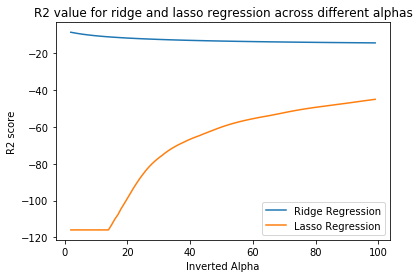

In [270]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=1, fit_intercept=False) 
ridgeregr.fit(X_train_tfidf, y_train)
lass.fit(X_train_tfidf, y_train)
estimates = np.append([0], ridgeregr.score(X_test_tfidf, y_test))
lestimates = np.append([0], lass.score(X_test_tfidf, y_test))
# Store scores.
score =[]
# Storing legend information.
labels = []

#Run the model for many alphas for ridge regression
for lambd in range(2, 100, 1):
    a = 1/lambd
    ridgeregr = Ridge(alpha=a, fit_intercept=False)
    ridgeregr.fit(X_train_tfidf, y_train)
    rscore = ridgeregr.score(X_test_tfidf, y_test)
    estimates = np.row_stack((
        estimates,
        np.append([lambd], rscore)))

#Running it again for lasso regression
for lambd in range(2, 100, 1):
    #Lasso regression goes on a scale from 0 to 1, so I'm going to adjust alphas accordingly. 
    a = 1/lambd
    lass = Lasso(alpha=a, fit_intercept=False)
    lass.fit(X_train_tfidf, y_train)
    lscore = lass.score(X_test_tfidf, y_test)
    lestimates = np.row_stack((
        lestimates,
        np.append([lambd], lscore)))
#Removing a set of outliers created by how we made the array. 
estimates = np.delete(estimates, 0, 0)
lestimates = np.delete(lestimates, 0, 0)
# Plot a line for each alpha for it's R2
plt.plot(estimates[:,0], estimates[:,1], label='Ridge Regression')
plt.plot(lestimates[:,0], lestimates[:,1], label='Lasso Regression')
plt.xlabel('Inverted Alpha')
plt.title('R2 value for ridge and lasso regression across different alphas')
plt.ylabel('R2 score')
plt.legend()
plt.show()

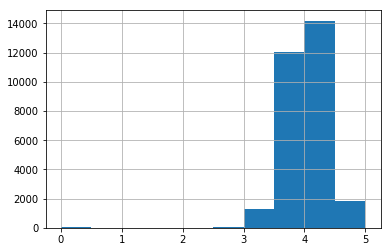

In [273]:
dfasc['book_rating'].hist()

I'm officially out of ideas here. I'll turn this in, hopefully we can talk about how to improve the features and the model. I could try to normalize the bookrating and book_rating_number, but I don't know if I have a single dimensional feature to normalize it against. 